# Python で米国株をデータ分析

本のソースコード:
https://gist.github.com/beavis28/5244d2340761b45f490a240eb7d54f30#file-python-usstockdataanalytics-ipyn

Twitter:
https://twitter.com/beavis28

Youtube:
https://www.youtube.com/watch?v=L8J9YiWuv0A

yahoo_fin ライブラリのドキュメント
http:// theautomatic. net/ yahoo_ fin-documentation/

<pre>
[FinTech API:]
Yahoo Finance
Alpha Vantage
MorningSTAR
OECD API
Trading Economics API
Quandl API
TradeStation Web API
Alpha Wave Data API
Rapid API
</pre>

In [1]:
! pip install yahoo_fin

     |████████████████████████████████| 81 kB 3.2 MB/s 
     |████████████████████████████████| 83 kB 665 kB/s 
     |████████████████████████████████| 111 kB 49.9 MB/s 
     |████████████████████████████████| 127 kB 52.0 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=01c55630b7cc0151237e1289d633de180d05f2342555bd6b00b5d67ac3d2614e
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=f7bedf3d516ada13a4c836548cfec2c5980e8c1903f865fb8ee462ed2dfc3d8d
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=01b126abd7ed1a6b2d0c3bc4a1ad0a7e6a71a916d168387764cb7bcb63bfe2e8
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [2]:
import yahoo_fin.stock_info as si 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [24, 8]

In [4]:
# show Zoom price as DataFrame 

symbol = 'ZM'
hist_data = si.get_data(symbol)
hist_data

open        high         low       close    adjclose  \
2019-04-18   65.000000   66.000000   60.320999   62.000000   62.000000   
2019-04-22   61.000000   68.900002   59.939999   65.699997   65.699997   
2019-04-23   66.870003   74.168999   65.550003   69.000000   69.000000   
2019-04-24   71.400002   71.500000   63.160000   63.200001   63.200001   
2019-04-25   64.739998   66.849998   62.599998   65.000000   65.000000   
...                ...         ...         ...         ...         ...   
2022-02-28  126.790001  135.089996  125.099998  132.600006  132.600006   
2022-03-01  128.570007  136.000000  122.129997  122.779999  122.779999   
2022-03-02  122.250000  122.889999  114.519997  121.610001  121.610001   
2022-03-03  122.000000  122.059998  111.949997  113.110001  113.110001   
2022-03-04  114.099998  116.190002  108.440002  108.940002  108.940002   

              volume ticker  
2019-04-18  25764700     ZM  
2019-04-22   9949700     ZM  
2019-04-23   6786500     ZM  
2019-04-24   4973500     ZM  
2019-04-25   3863300     ZM  
...              ...    ...  
2022-02-28  12033100     ZM  
2022-03-01  11541600     ZM  
2022-03-02   7224300     ZM  
2022-03-03   6194800     ZM  
2022-03-04   6178377     ZM  

[726 rows x 7 columns]

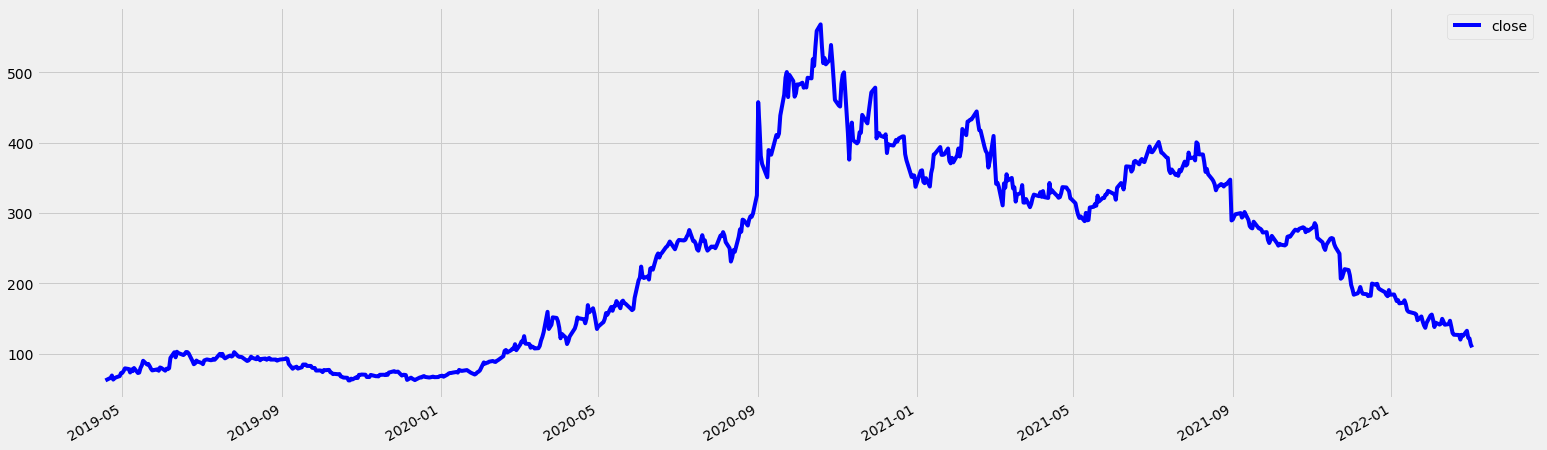

In [5]:
# extract 'close' (終値) column data ans plot graph.
chart = hist_data.plot(kind='line', y='close', color='blue')

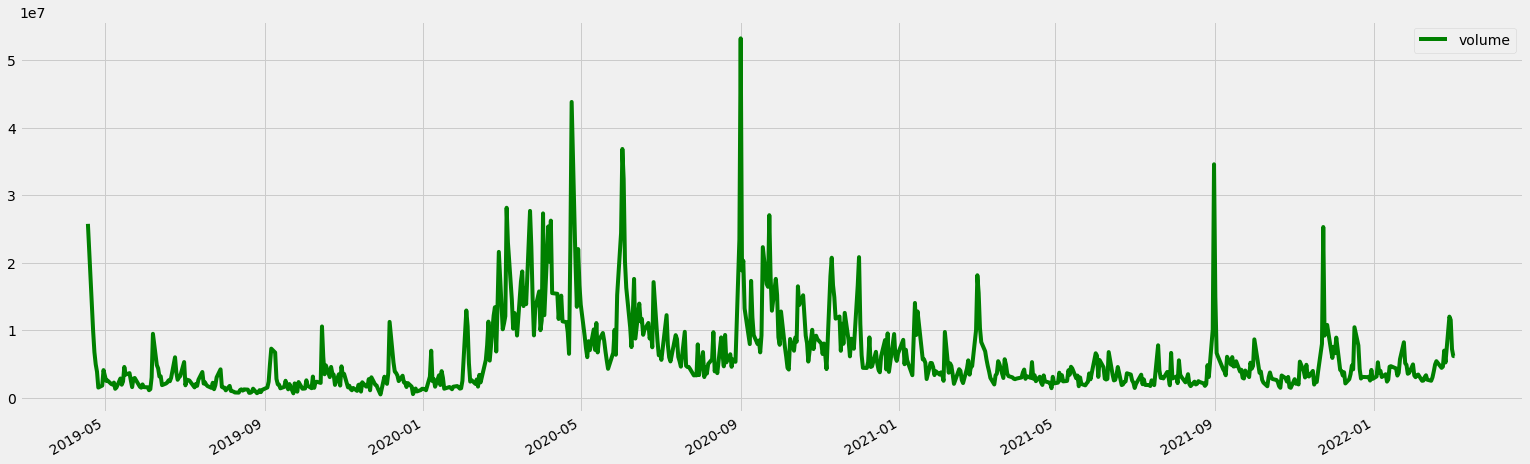

In [6]:
# extract 'volume' (取引量) data and plot graph.
volume = hist_data.plot(kind='line', y='volume', color='green')

In [7]:
# 財務諸表
income_statement = si.get_income_statement(symbol, yearly=False)   # yearly=False 直近の4四半期データを見る
income_statement

endDate                            2022-01-31  2021-10-31  2021-07-31  \
Breakdown                                                               
researchDevelopment                 116996000    98508000    82311000   
effectOfAccountingCharges                None        None        None   
incomeBeforeTax                     138534000   410283000   323884000   
minorityInterest                         None        None        None   
netIncome                           490641000   340383000   317084000   
sellingGeneralAdministrative        445214000   390434000   383325000   
grossProfit                         814029000   779799000   760239000   
ebit                                251819000   290857000   294603000   
operatingIncome                     251819000   290857000   294603000   
otherOperatingExpenses                   None        None        None   
interestExpense                          None        None        None   
extraordinaryItems                       None        None        None   
nonRecurring                             None        None        None   
otherItems                               None        None        None   
incomeTaxExpense                   -352107000    69900000     6800000   
totalRevenue                       1071376000  1050756000  1021495000   
totalOperatingExpenses              819557000   759899000   726892000   
costOfRevenue                       257347000   270957000   261256000   
totalOtherIncomeExpenseNet         -113285000   119426000    29281000   
discontinuedOperations                   None        None        None   
netIncomeFromContinuingOps          490641000   340383000   317084000   
netIncomeApplicableToCommonShares   490525000   340271000   316930000   

endDate                           2021-04-30  
Breakdown                                     
researchDevelopment                 65175000  
effectOfAccountingCharges               None  
incomeBeforeTax                    228931000  
minorityInterest                        None  
netIncome                          227531000  
sellingGeneralAdministrative       332856000  
grossProfit                        691243000  
ebit                               293212000  
operatingIncome                    293212000  
otherOperatingExpenses                  None  
interestExpense                         None  
extraordinaryItems                      None  
nonRecurring                            None  
otherItems                              None  
incomeTaxExpense                     1400000  
totalRevenue                       956237000  
totalOperatingExpenses             663025000  
costOfRevenue                      264994000  
totalOtherIncomeExpenseNet         -64281000  
discontinuedOperations                  None  
netIncomeFromContinuingOps         227531000  
netIncomeApplicableToCommonShares  227383000

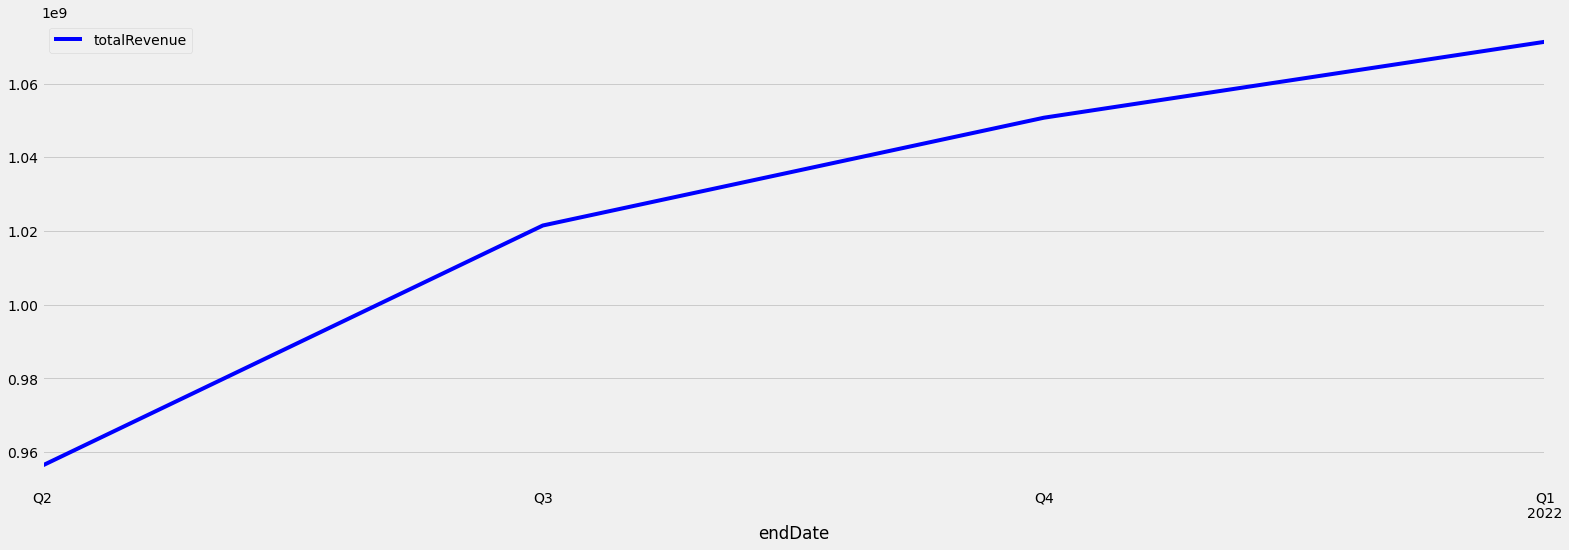

In [8]:
# 売上グラフ
income_statement_for_graph = si.get_income_statement(symbol, yearly=False).transpose()
income_statement_for_graph.plot(kind='line', y='totalRevenue', color='blue')

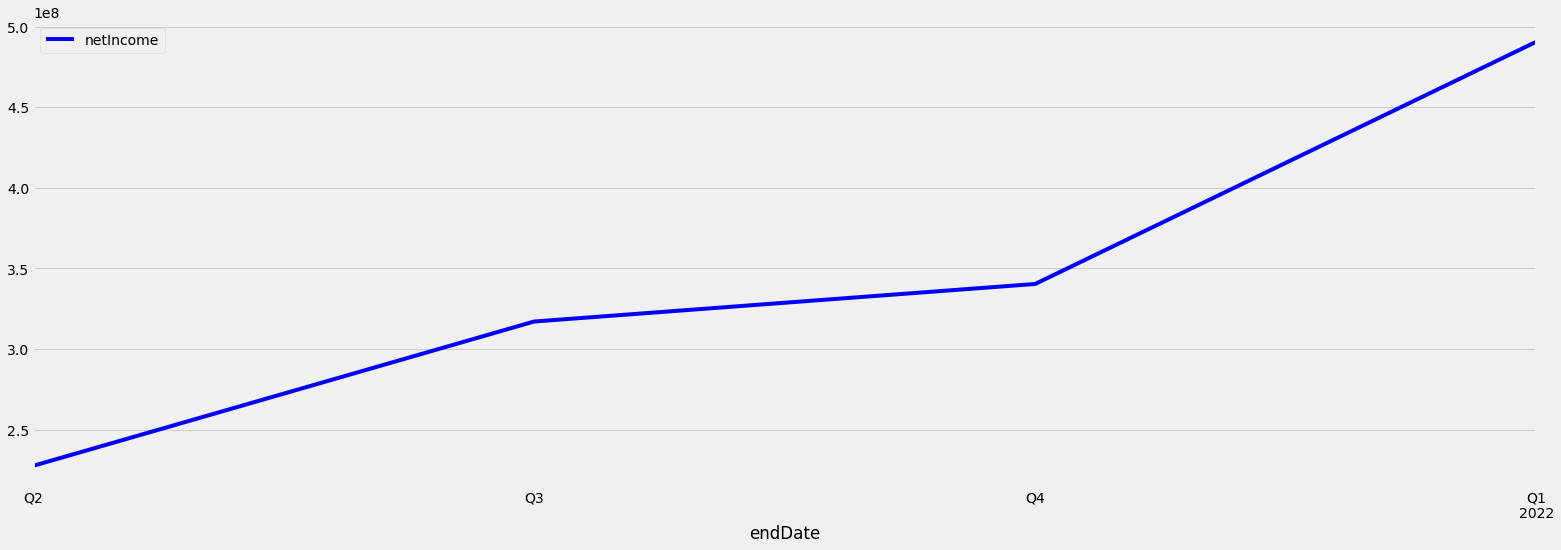

In [9]:
# 利益ぐラフ
income_statement_for_graph.plot(kind='line', y='netIncome', color='blue')

# PSR を調べる

PSR = Price-Sales Ratio

$\displaystyle \mbox{P/S Ratio} = \frac{\mbox{Market Capitalization}}{\mbox{Revenue}} = \frac{\mbox{Per-Share Stock Price}}{\mbox{Per-Share Revenue}}$

$\mbox{Revenue} = \mbox{年間売り上げ}$

$\mbox{Market Capitalization} = \mbox{現在の株価} \times \mbox{発行株式数}$

過去の4半期の売り上げ(totalRevenue)を足し合わせたもので、Market Capitalization を割って PSRを計算してみる。

In [10]:
income_statement_yearly = si.get_income_statement(symbol, yearly = True)
market_cap = si.get_quote_table(symbol)['Market Cap']
market_cap_char = market_cap[-1]
unit = 0
if market_cap_char == 'B':
    unit = 1000000000
elif market_cap_char == 'T':
    unit = 1000000000000
elif market_cap_char == 'M':
    unit = 1000000
                
psr = (float(market_cap[:-1]) * unit) / (income_statement.loc['totalRevenue'][0]+income_statement.loc['totalRevenue'][1]+income_statement.loc['totalRevenue'][2]+income_statement.loc['totalRevenue'][3])
print(psr)

7.918311436672045


## 高成長企業を評価するときに使われる「40%ルール」

「売り上げ成長率｜利益成長率」が40% を超えているかで、
ボートフォリオに入れる企業を選ぶことがある。

In [11]:
fourty_rule = (income_statement.loc['grossProfit'][0]/income_statement.loc['grossProfit'][1] - 1) + (income_statement.loc['totalRevenue'][0]/income_statement.loc['totalRevenue'][1] - 1)
"{0:.0%}".format(fourty_rule)

'6%'

## 企業同士を比較する

GAFAM を含んだ多くの成長企業を比較してみる。

fourty_rule と 0.4 を比較することで、40%ルールに満たない会社を省略している。

In [12]:
# quaterly base growth rate

nasdaq_list = ["AAPL","ADBE","AMD","AMZN","ATVI","AVGO","BA","BABA","BOX","CCI","CHGG","CRM","CRWD","CSCO","CTXS","CVNA",
               "DBX","DDOG","DIS","DLR","DOCU","EA","EBAY","EQIX","ETSY","FB","FSLY","FVRR","GDS","GILD","GOOG","HON","IBM",
               "INTC","ISRG","KMX","LOGI","LYFT","MA","MCK","MDB","MSFT","MTCH","MU","NDX","NET","NFLX","NUE",
               "NVDA","OKTA","ORCL","PANW","PINS", "PYPL","QCOM","RNG","PTON","ROKU","SHOP","SNAP","SNOW",
               "SPLK","SPOT","SQ","SWKS","T","TEAM","TMO","TMUS","TSLA","TTD","TTWO","TW","TWLO","TWTR","U",
               "V","VMW","VZ","WDAY","WIX","WORK","XLNX","ZI", "ZM","ZS"]  # si.tickers_nasdaq()

symbol_list = []
gross_profit_list = []
total_revenue_list = []
gross_growth_list = []
revenue_growth_list = []
fourty_list = []
psr_list = []
for symbol in nasdaq_list:
    try:
        income_statement = si.get_income_statement(symbol, yearly = False)
        fourty_rule = (income_statement.loc['grossProfit'][0]/income_statement.loc['grossProfit'][1] - 1) + (income_statement.loc['totalRevenue'][0]/income_statement.loc['totalRevenue'][1] - 1)
        if fourty_rule > 0.4:
            gross_profit = income_statement.loc['grossProfit'][0]
            total_revenue = income_statement.loc['totalRevenue'][0]
            gross_growth = (income_statement.loc['grossProfit'][0]/income_statement.loc['grossProfit'][1] - 1)
            total_revenue_growth = (income_statement.loc['totalRevenue'][0]/income_statement.loc['totalRevenue'][1] - 1)

            market_cap = si.get_quote_table(symbol)['Market Cap']
            market_cap_char = market_cap[-1]
            unit = 0
            if market_cap_char == 'B':
                unit = 1000000000
            elif market_cap_char == 'T':
                unit = 1000000000000
            elif market_cap_char == 'M':
                unit = 1000000
                
            psr = (float(market_cap[:-1]) * unit) / (income_statement.loc['totalRevenue'][0]+income_statement.loc['totalRevenue'][1]+income_statement.loc['totalRevenue'][2]+income_statement.loc['totalRevenue'][3])

                
            symbol_list.append(symbol)
            #fourty_list.append("{0:.0%}".format(fourty_rule))
            gross_profit_list.append(gross_profit)
            total_revenue_list.append(total_revenue)
            gross_growth_list.append(gross_growth)
            revenue_growth_list.append(total_revenue_growth)
            fourty_list.append(round(fourty_rule,2)*100)
            psr_list.append(psr)
            
    except Exception as e:
        str(e)
        
# result
result_df = pd.DataFrame(list(zip(gross_profit_list, total_revenue_list, gross_growth_list, revenue_growth_list, fourty_list, psr_list)), columns=['grossProfit','totalRevenue','GrossGrowth','RevenueGrowth','Percentage', 'PSR'], index=symbol_list)
result_df

/usr/local/lib/python3.7/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


grossProfit  totalRevenue  GrossGrowth  RevenueGrowth  Percentage  \
AAPL  54243000000  123945000000     0.542133       0.486864       103.0   
BABA  95922000000  242580000000     0.352157       0.208730        56.0   
CHGG    151757000     207467000     0.447510       0.206610        65.0   
DDOG    259141000     326198000     0.250572       0.205961        46.0   
ETSY    508173000     717139000     0.341644       0.346919        69.0   
LOGI    661136000    1632782000     0.210874       0.249960        46.0   
PINS    705407000     846655000     0.393675       0.337671        73.0   
PTON    280100000    1133900000     0.066235       0.408396        47.0   
SNAP    848734000    1297885000     0.360155       0.215850        58.0   
SPLK    710753000     901119000     0.491734       0.355574        85.0   
TSLA   4847000000   17719000000     0.324317       0.287999        61.0   
TTD     328753000     395598000     0.327271       0.313882        64.0   
TWTR   1052129000    1567220000     0.316250       0.220750        54.0   

            PSR  
AAPL   7.038959  
BABA   0.325586  
CHGG   5.339671  
DDOG  43.386172  
ETSY   8.266663  
LOGI   2.115938  
PINS   6.172938  
PTON   1.882219  
SNAP  13.054985  
SPLK   7.664763  
TSLA  16.096855  
TTD   30.658597  
TWTR   5.265011

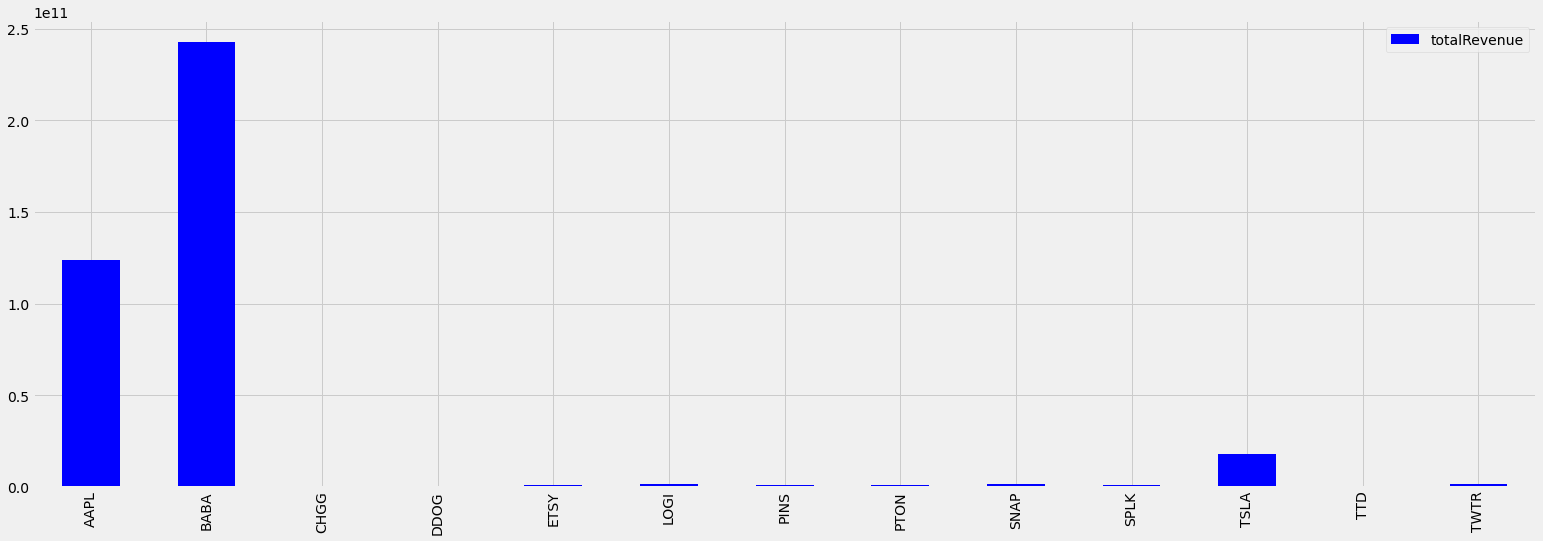

In [13]:
# 売り上げを棒グラフで見る

result_df.plot(kind='bar', y='totalRevenue',color='blue')

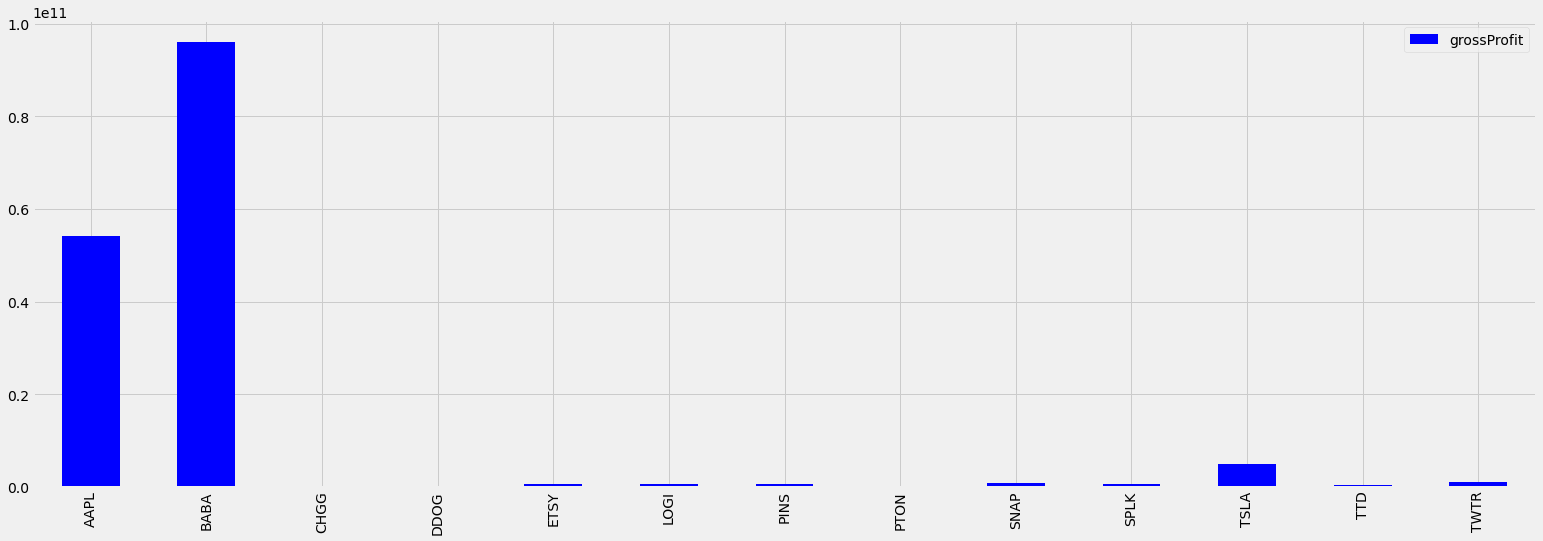

In [14]:
# 利益を棒グラフで見る

result_df.plot(kind='bar', y='grossProfit',color='blue')

## 比較した企業をグラフで描く

横軸を「利益成長率(IncomeGrowth)」、縦軸を「売上成長率(RevenueGrowth)」でグラフに表示してみる。

右上に表示される会社が最も優れていることになる。

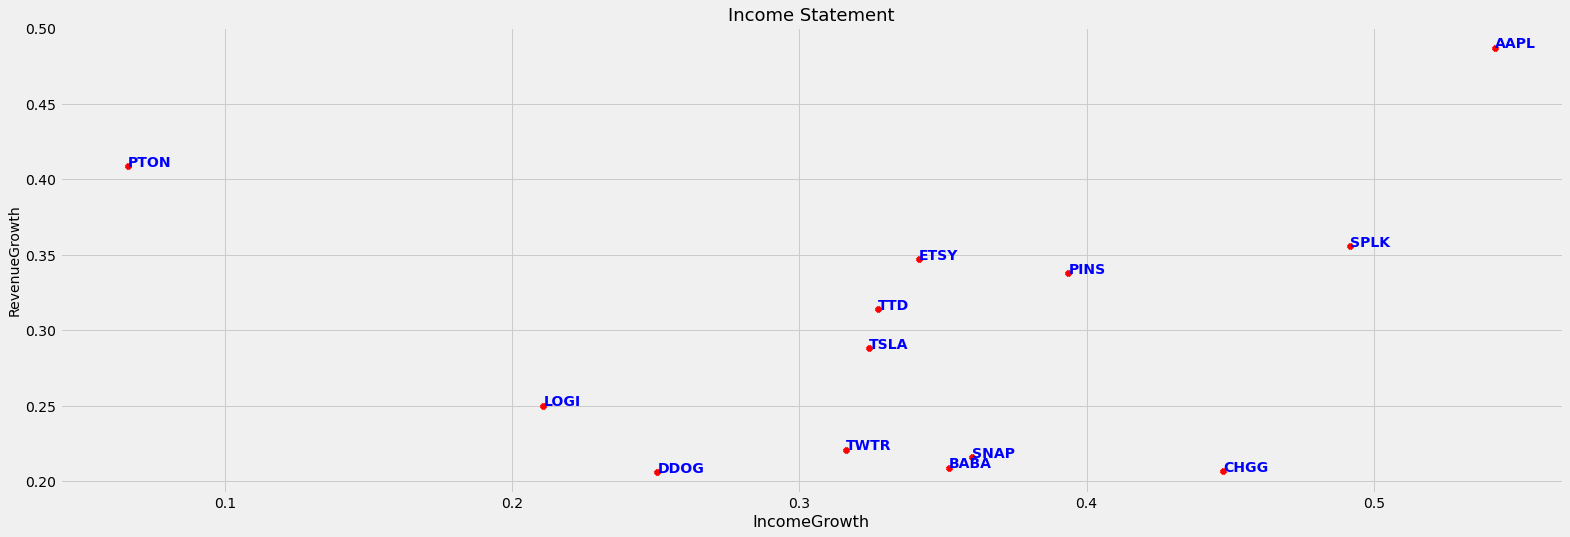

In [15]:
# 比較した企業をグラフで描く

p = result_df.plot(kind='scatter',x='GrossGrowth',y='RevenueGrowth',color='red', marker='x')
p.set_xlabel('IncomeGrowth', fontsize=16)
p.set_ylabel('RevenueGrowth', fontsize=14)
p.set_title('Income Statement', fontsize=18)
plt.rcParams['figure.figsize'] = [20, 8]

for i in range(0,result_df.shape[0]):
     p.text(result_df.GrossGrowth[i], result_df.RevenueGrowth[i], 
     result_df.index[i], horizontalalignment='left', 
     size='medium', color='blue', weight='semibold')

横軸を「成長率」、縦軸をPSRとして「40%ルール」のグラフを作る。

PSR が低くて、成長率が高い(＝グラフの右下に位置する)会社 の株を買うとよい。

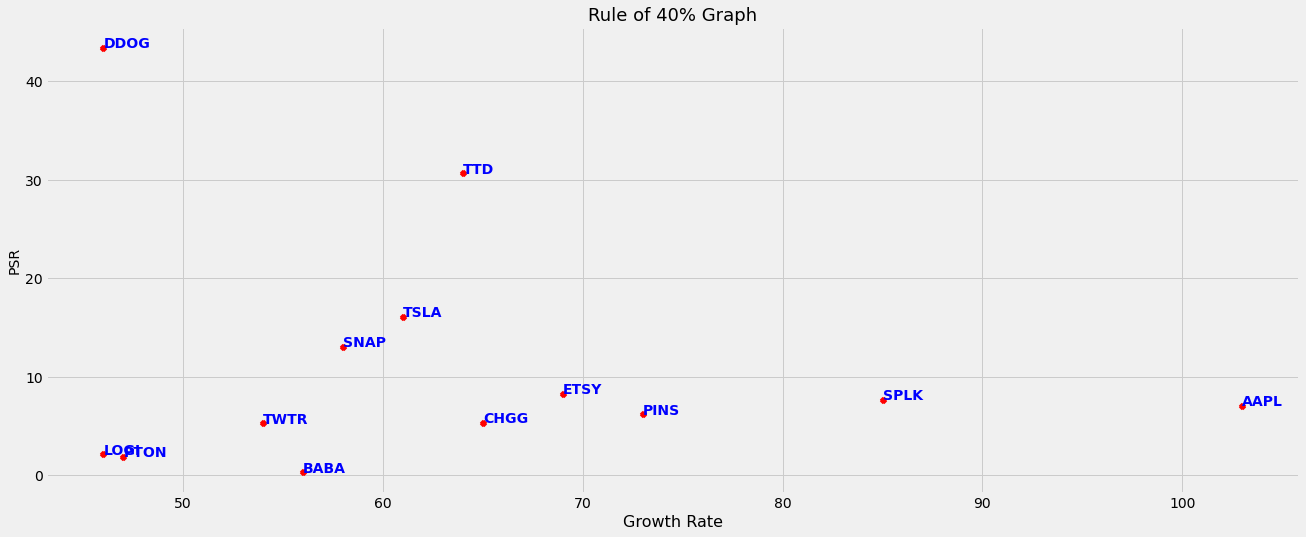

In [16]:
p = result_df.plot(kind='scatter',x='Percentage',y='PSR',color='red', marker='x')
p.set_xlabel('Growth Rate', fontsize=16)
p.set_ylabel('PSR', fontsize=14)
p.set_title('Rule of 40% Graph', fontsize=18)

for i in range(0,result_df.shape[0]):
     p.text(result_df.Percentage[i], result_df.PSR[i], 
     result_df.index[i], horizontalalignment='left', 
     size='medium', color='blue', weight='semibold')


## 株価の成長率を見る

新しいカラムを作り、そこに3か月間の株価の成長率を入れてみる

In [17]:
new_column = []
for symbol in result_df.index: 
    try:
        three_months_ago = date.today() + relativedelta(months=-3)
        three_months_ago_yyyy_mm_dd = three_months_ago.strftime('%Y-%m-%d')
        hist_data = si.get_data(symbol, start_date=three_months_ago_yyyy_mm_dd)
        price_growth = hist_data.iloc[-1, hist_data.columns.get_loc('close')]/hist_data.iloc[0, hist_data.columns.get_loc('close')] - 1
        new_column.append(price_growth*100) 
    except Exception as e:
        print(str(e))
        
new_column

[-1.3005135857857342,
 -18.608414469208633,
 4.451238370228605,
 -11.907565073189442,
 -32.60559740433675,
 -6.893041279751166,
 -36.06557244767803,
 -44.716406582251345,
 -30.947409396956203,
 13.6691884075403,
 -16.919557792884177,
 -15.58629255762457,
 -24.91567692131379]

In [18]:
result_df['Price_growth'] = new_column 

In [19]:
result_df = result_df.sort_values(by=['Price_growth'], ascending=False)
result_df

grossProfit  totalRevenue  GrossGrowth  RevenueGrowth  Percentage  \
SPLK    710753000     901119000     0.491734       0.355574        85.0   
CHGG    151757000     207467000     0.447510       0.206610        65.0   
AAPL  54243000000  123945000000     0.542133       0.486864       103.0   
LOGI    661136000    1632782000     0.210874       0.249960        46.0   
DDOG    259141000     326198000     0.250572       0.205961        46.0   
TTD     328753000     395598000     0.327271       0.313882        64.0   
TSLA   4847000000   17719000000     0.324317       0.287999        61.0   
BABA  95922000000  242580000000     0.352157       0.208730        56.0   
TWTR   1052129000    1567220000     0.316250       0.220750        54.0   
SNAP    848734000    1297885000     0.360155       0.215850        58.0   
ETSY    508173000     717139000     0.341644       0.346919        69.0   
PINS    705407000     846655000     0.393675       0.337671        73.0   
PTON    280100000    1133900000     0.066235       0.408396        47.0   

            PSR  Price_growth  
SPLK   7.664763     13.669188  
CHGG   5.339671      4.451238  
AAPL   7.038959     -1.300514  
LOGI   2.115938     -6.893041  
DDOG  43.386172    -11.907565  
TTD   30.658597    -15.586293  
TSLA  16.096855    -16.919558  
BABA   0.325586    -18.608414  
TWTR   5.265011    -24.915677  
SNAP  13.054985    -30.947409  
ETSY   8.266663    -32.605597  
PINS   6.172938    -36.065572  
PTON   1.882219    -44.716407

利上げ観測と、ロシアによるウクライナ侵攻でグロース株は軒並み下落しているところであることがわかる。

横軸を「売上＋利益成長率」、縦軸を「株価成長率」としたグラフを描く。

右下に位置する会社が、成長率が高いが、株価があまり上がっていないことを表すので、ねらい目となる。

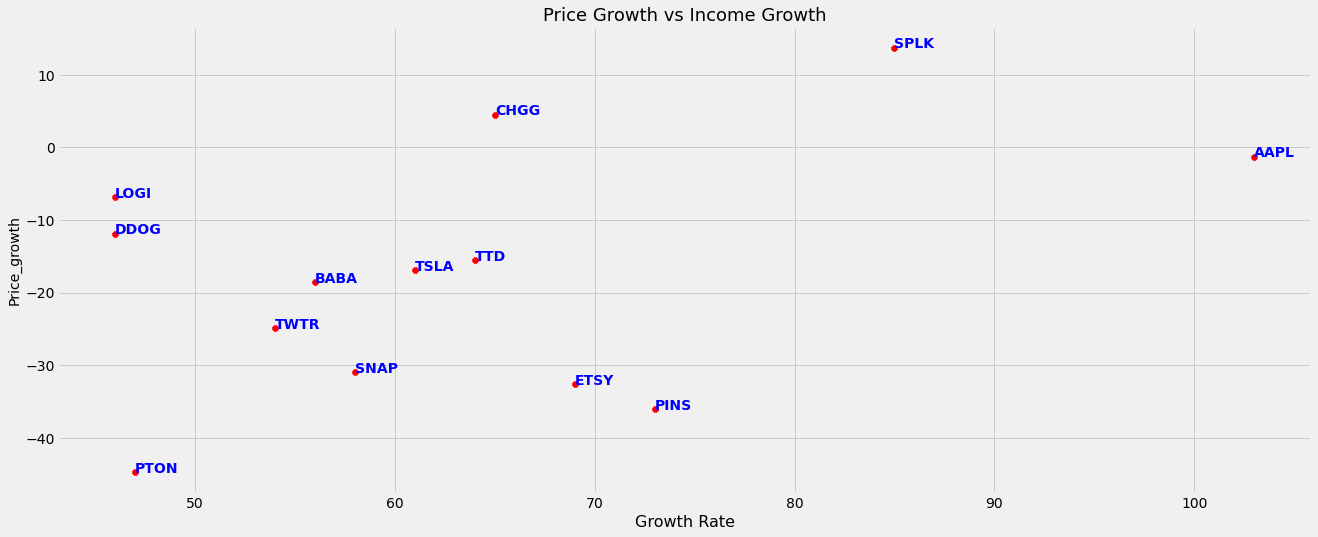

In [24]:
p = result_df.plot(kind='scatter',x='Percentage',y='Price_growth',color='red', marker='x')
p.set_xlabel('Growth Rate', fontsize=16)
p.set_ylabel('Price_growth', fontsize=14)
p.set_title('Price Growth vs Income Growth', fontsize=18)

for i in range(0,result_df.shape[0]):
     p.text(result_df.Percentage[i], result_df.Price_growth[i], 
     result_df.index[i], horizontalalignment='left', 
     size='medium', color='blue', weight='semibold')

## 割安感を知る

割安な株価を知るために、成長率をPSRで割ってみる。

In [20]:
new_column = []
for index, row in result_df.iterrows():
    try:
        new_column.append(row['Percentage'] / row['PSR'])
    except Exception as e:
        print(str(e))
        
result_df['percentage/PSR'] = new_column
result_df = result_df.sort_values(by=['percentage/PSR'], ascending=False)
result_df

grossProfit  totalRevenue  GrossGrowth  RevenueGrowth  Percentage  \
BABA  95922000000  242580000000     0.352157       0.208730        56.0   
PTON    280100000    1133900000     0.066235       0.408396        47.0   
LOGI    661136000    1632782000     0.210874       0.249960        46.0   
AAPL  54243000000  123945000000     0.542133       0.486864       103.0   
CHGG    151757000     207467000     0.447510       0.206610        65.0   
PINS    705407000     846655000     0.393675       0.337671        73.0   
SPLK    710753000     901119000     0.491734       0.355574        85.0   
TWTR   1052129000    1567220000     0.316250       0.220750        54.0   
ETSY    508173000     717139000     0.341644       0.346919        69.0   
SNAP    848734000    1297885000     0.360155       0.215850        58.0   
TSLA   4847000000   17719000000     0.324317       0.287999        61.0   
TTD     328753000     395598000     0.327271       0.313882        64.0   
DDOG    259141000     326198000     0.250572       0.205961        46.0   

            PSR  Price_growth  percentage/PSR  
BABA   0.325586    -18.608414      171.997415  
PTON   1.882219    -44.716407       24.970523  
LOGI   2.115938     -6.893041       21.739769  
AAPL   7.038959     -1.300514       14.632846  
CHGG   5.339671      4.451238       12.173034  
PINS   6.172938    -36.065572       11.825812  
SPLK   7.664763     13.669188       11.089711  
TWTR   5.265011    -24.915677       10.256388  
ETSY   8.266663    -32.605597        8.346778  
SNAP  13.054985    -30.947409        4.442747  
TSLA  16.096855    -16.919558        3.789560  
TTD   30.658597    -15.586293        2.087506  
DDOG  43.386172    -11.907565        1.060246

## Market Capitalization をグラフ化する

Market Capitalization は、$\mbox{株価} \times \mbox{発行株式数}$ なので、企業の規模がわかる。

In [21]:
new_column = []
for index, row in result_df.iterrows():
    try:
        market_cap = si.get_quote_table(index)['Market Cap']
        market_cap_char = market_cap[-1]
        unit = 0
        if market_cap_char == 'B':
            unit = 1000000000
        elif market_cap_char == 'T':
            unit = 1000000000000
        elif market_cap_char == 'M':
            unit = 1000000
                       
        marketCap = (float(market_cap[:-1]) * unit)
        new_column.append(marketCap)
    except Exception as e:
        print(str(e))
        
result_df['marketCap'] = new_column
result_df

grossProfit  totalRevenue  GrossGrowth  RevenueGrowth  Percentage  \
BABA  95922000000  242580000000     0.352157       0.208730        56.0   
PTON    280100000    1133900000     0.066235       0.408396        47.0   
LOGI    661136000    1632782000     0.210874       0.249960        46.0   
AAPL  54243000000  123945000000     0.542133       0.486864       103.0   
CHGG    151757000     207467000     0.447510       0.206610        65.0   
PINS    705407000     846655000     0.393675       0.337671        73.0   
SPLK    710753000     901119000     0.491734       0.355574        85.0   
TWTR   1052129000    1567220000     0.316250       0.220750        54.0   
ETSY    508173000     717139000     0.341644       0.346919        69.0   
SNAP    848734000    1297885000     0.360155       0.215850        58.0   
TSLA   4847000000   17719000000     0.324317       0.287999        61.0   
TTD     328753000     395598000     0.327271       0.313882        64.0   
DDOG    259141000     326198000     0.250572       0.205961        46.0   

            PSR  Price_growth  percentage/PSR     marketCap  
BABA   0.325586    -18.608414      171.997415  2.723220e+11  
PTON   1.882219    -44.716407       24.970523  7.789000e+09  
LOGI   2.115938     -6.893041       21.739769  1.224500e+10  
AAPL   7.038959     -1.300514       14.632846  2.663000e+12  
CHGG   5.339671      4.451238       12.173034  4.145000e+09  
PINS   6.172938    -36.065572       11.825812  1.591400e+10  
SPLK   7.664763     13.669188       11.089711  2.049300e+10  
TWTR   5.265011    -24.915677       10.256388  2.673300e+10  
ETSY   8.266663    -32.605597        8.346778  1.925400e+10  
SNAP  13.054985    -30.947409        4.442747  5.374800e+10  
TSLA  16.096855    -16.919558        3.789560  8.663810e+11  
TTD   30.658597    -15.586293        2.087506  3.668200e+10  
DDOG  43.386172    -11.907565        1.060246  4.463500e+10

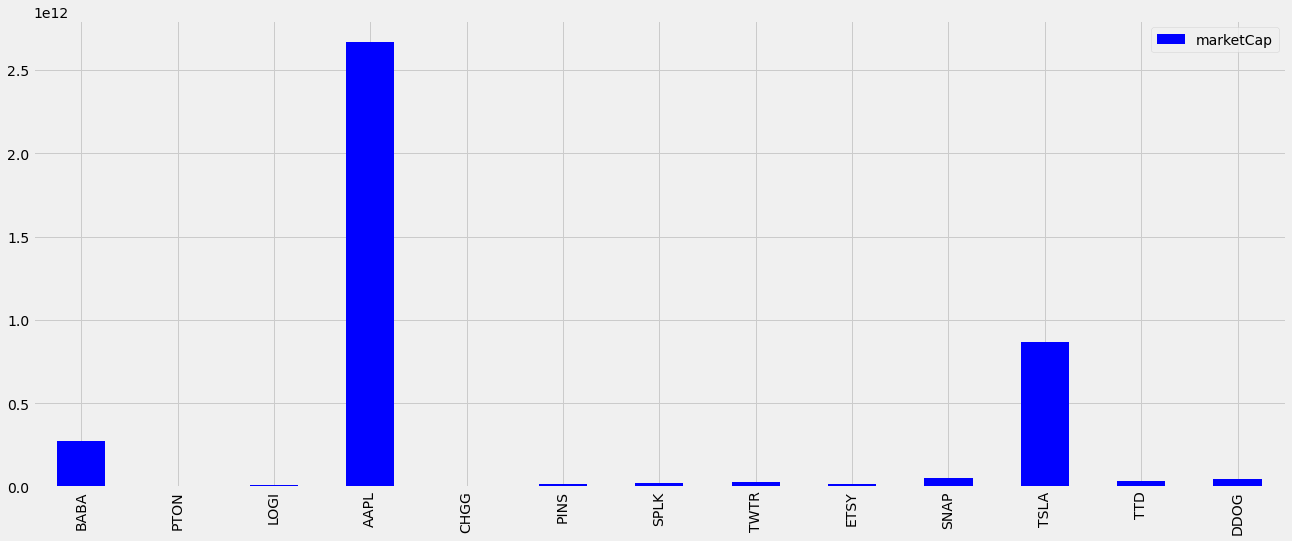

In [22]:
result_df.plot(kind='bar', y='marketCap',color='blue')

In [23]:
estimate_column = []
estimate_price_column = []
current_price_column = []

for index, row in result_df.iterrows():
    try:
        estimate = si.get_analysts_info(index)['Growth Estimates'].iloc[1,1]
        if type(estimate) == str:
            estimate_float = float(estimate[:-1].replace(",", ""))
            four_months_ago = date.today() + relativedelta(months=-4)
            hist_data = si.get_data(index, start_date=four_months_ago)
            four_months_ago_price = hist_data.iloc[0, hist_data.columns.get_loc('close')]
            cur_price = hist_data.iloc[-1, hist_data.columns.get_loc('close')]
            abs_value = abs(cur_price - four_months_ago_price)
            future_price = (abs_value * (estimate_float/100)) + four_months_ago_price
        else:
            estimate_float = 0
            future_price = 0
            cur_price = 0
        current_price_column.append(cur_price)    
        estimate_column.append(estimate_float)
        estimate_price_column.append(future_price)
    except Exception as e:
        print(str(e))
        
result_df['nextQuarterlyEstimate'] = estimate_column
result_df['current price'] = current_price_column
result_df['estimated price'] = estimate_price_column
result_df

grossProfit  totalRevenue  GrossGrowth  RevenueGrowth  Percentage  \
BABA  95922000000  242580000000     0.352157       0.208730        56.0   
PTON    280100000    1133900000     0.066235       0.408396        47.0   
LOGI    661136000    1632782000     0.210874       0.249960        46.0   
AAPL  54243000000  123945000000     0.542133       0.486864       103.0   
CHGG    151757000     207467000     0.447510       0.206610        65.0   
PINS    705407000     846655000     0.393675       0.337671        73.0   
SPLK    710753000     901119000     0.491734       0.355574        85.0   
TWTR   1052129000    1567220000     0.316250       0.220750        54.0   
ETSY    508173000     717139000     0.341644       0.346919        69.0   
SNAP    848734000    1297885000     0.360155       0.215850        58.0   
TSLA   4847000000   17719000000     0.324317       0.287999        61.0   
TTD     328753000     395598000     0.327271       0.313882        64.0   
DDOG    259141000     326198000     0.250572       0.205961        46.0   

            PSR  Price_growth  percentage/PSR     marketCap  \
BABA   0.325586    -18.608414      171.997415  2.723220e+11   
PTON   1.882219    -44.716407       24.970523  7.789000e+09   
LOGI   2.115938     -6.893041       21.739769  1.224500e+10   
AAPL   7.038959     -1.300514       14.632846  2.663000e+12   
CHGG   5.339671      4.451238       12.173034  4.145000e+09   
PINS   6.172938    -36.065572       11.825812  1.591400e+10   
SPLK   7.664763     13.669188       11.089711  2.049300e+10   
TWTR   5.265011    -24.915677       10.256388  2.673300e+10   
ETSY   8.266663    -32.605597        8.346778  1.925400e+10   
SNAP  13.054985    -30.947409        4.442747  5.374800e+10   
TSLA  16.096855    -16.919558        3.789560  8.663810e+11   
TTD   30.658597    -15.586293        2.087506  3.668200e+10   
DDOG  43.386172    -11.907565        1.060246  4.463500e+10   

      nextQuarterlyEstimate  current price  estimated price  
BABA                  -15.2     100.599998       152.802883  
PTON                   35.2      23.490000        61.021520  
LOGI                  -46.5      73.209999        76.537700  
AAPL                   -3.8     163.169998       149.956263  
CHGG                  -18.6      30.740000        30.772561  
PINS                  -32.0      24.180000        39.398401  
SPLK                   16.1     129.059998       175.070433  
TWTR                  -20.0      33.389999        49.942001  
ETSY                   14.7     151.570007       276.925612  
SNAP                  -20.0      33.090000        50.538001  
TSLA                   70.3     838.289978      1391.168866  
TTD                     5.6      75.660004        89.483040  
DDOG                   20.0     142.190002       201.182007

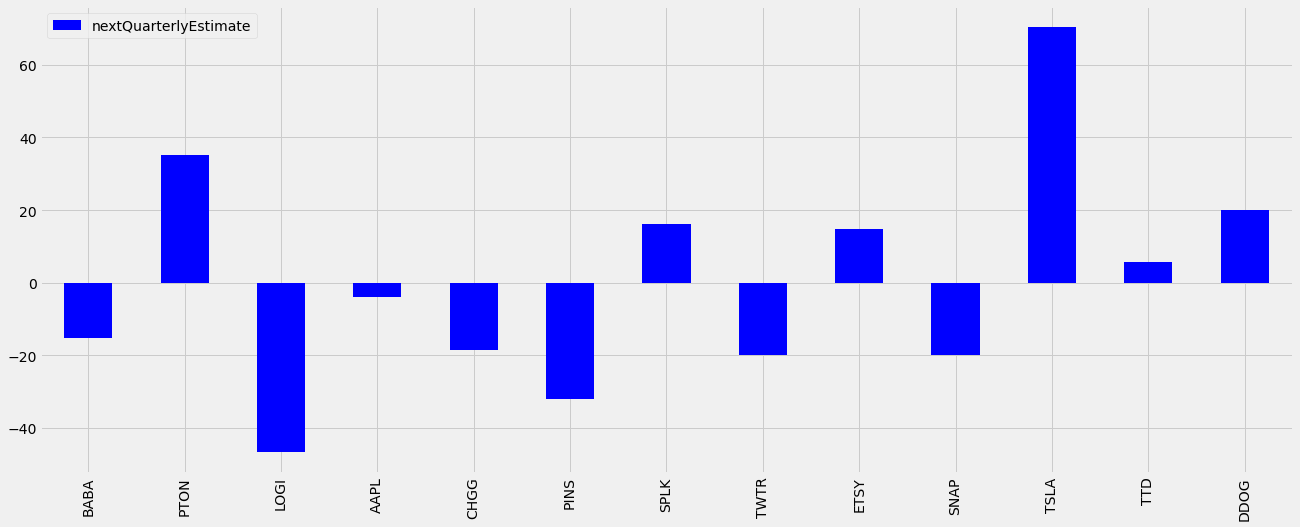

In [25]:
result_df.plot(kind='bar', y='nextQuarterlyEstimate',color='blue')

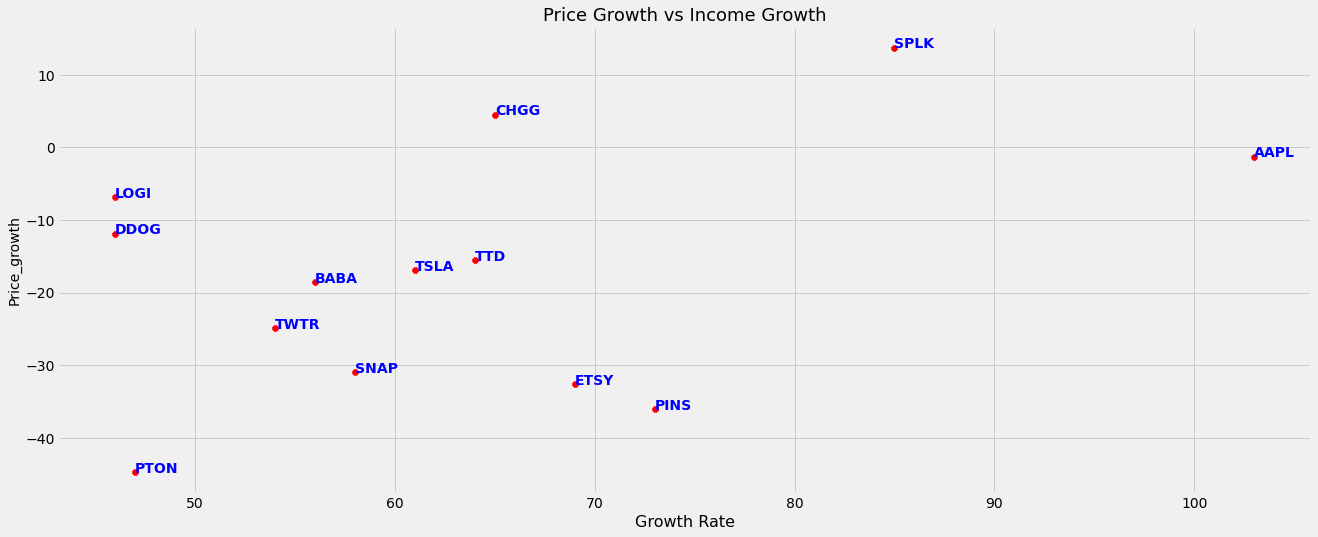

In [26]:
p = result_df.plot(kind='scatter',x='Percentage',y='Price_growth',color='red', marker='x')
p.set_xlabel('Growth Rate', fontsize=16)
p.set_ylabel('Price_growth', fontsize=14)
p.set_title('Price Growth vs Income Growth', fontsize=18)

for i in range(0,result_df.shape[0]):
     p.text(result_df.Percentage[i], result_df.Price_growth[i], 
     result_df.index[i], horizontalalignment='left', 
     size='medium', color='blue', weight='semibold')